In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clin = pd.merge(clinical_data, mouse_data, on='Mouse ID')

# Display the data table for preview
mouse_clin.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [32]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorGrp = mouse_clin.groupby(['Drug', 'Timepoint'])
tumorVol = tumorGrp.mean()
tumorVol = tumorVol.reset_index()
del tumorVol['Metastatic Sites']

# Convert to DataFrame
tumorVol = pd.DataFrame(tumorVol)

# Preview DataFrame
tumorVol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [36]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorErr = tumorGrp.sem()
tumorErr = tumorErr.reset_index()
del tumorErr['Metastatic Sites']
del tumorErr['Mouse ID']

# Convert to DataFrame
tumorErr = pd.DataFrame(tumorErr)

# Preview DataFrame
tumorErr.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [61]:
# Minor Data Munging to Re-Format the Data Frames
tumorVolTab = pd.pivot_table( tumorVol,
                                  index = tumorVol['Timepoint'], 
                                  columns = ['Drug'], 
                                   values = ['Tumor Volume (mm3)'] )
tumorVolTab.columns = tumorVolTab.columns.droplevel()
tumorVolTab = tumorVolTab.reset_index()
tumorVolErrTab = pd.pivot_table( tumorErr,
                                  index = tumorErr['Timepoint'], 
                                  columns = ['Drug'], 
                                   values = ['Tumor Volume (mm3)'] )
tumorVolErrTab.columns = tumorVolErrTab.columns.droplevel()
tumorVolErrTab = tumorVolErrTab.reset_index()

# Preview that Reformatting worked
tumorVolErrTab.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


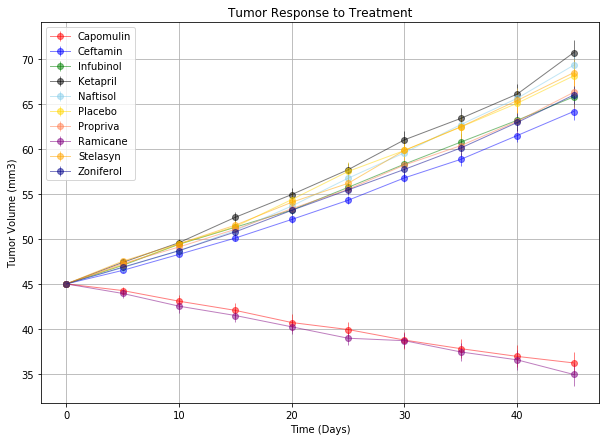

In [80]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,7))
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Capomulin'], tumorVolErrTab['Capomulin'], 
             marker ='o', color='red', label="Capomulin", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Ceftamin'], tumorVolErrTab['Ceftamin'], 
             marker ='o', color='blue', label="Ceftamin", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Infubinol'], tumorVolErrTab['Infubinol'], 
             marker ='o', color='green', label="Infubinol", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Ketapril'], tumorVolErrTab['Ketapril'], 
             marker ='o', color='black', label="Ketapril", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Naftisol'], tumorVolErrTab['Naftisol'], 
             marker ='o', color='skyblue', label="Naftisol", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Placebo'], tumorVolErrTab['Placebo'], 
             marker ='o', color='gold', label="Placebo", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Propriva'], tumorVolErrTab['Propriva'], 
             marker ='o', color='coral', label="Propriva", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Ramicane'], tumorVolErrTab['Ramicane'], 
             marker ='o', color='purple', label="Ramicane", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Stelasyn'], tumorVolErrTab['Stelasyn'], 
             marker ='o', color='orange', label="Stelasyn", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Zoniferol'], tumorVolErrTab['Zoniferol'], 
             marker ='o', color='darkblue', label="Zoniferol", alpha=0.5, linewidth=1.0)
plt.grid()
plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig('output/tumor_response_data.png')
plt.show()
